# Import Library


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Membaca Dataset


In [2]:
#membaca dataset pada direktori path
path = '/content/china_gdp.csv'
df = pd.read_csv(path)

In [3]:
# Menampilkan 10 data teratas
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


# Menampilkan Ploting Dataset

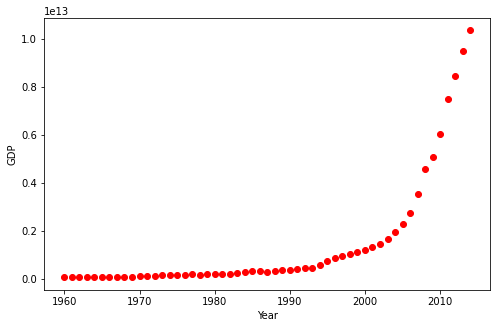

In [4]:
# Plotting dataset
x_data, y_data = (df["Year"].values, df["Value"].values)

plt.figure (figsize = (8, 5))
plt.plot(x_data, y_data, 'ro')
plt.ylabel("GDP")
plt.xlabel("Year")
plt.show()

# Membuat Model (Sigmoidal/Logistic) yang sesuai dengan dataset

In [5]:
# Membuat Model 

def model_sigmoid(x, Beta_1, Beta_2):
    ymodel = 1 / (1 + np.exp (-Beta_1 * (x - Beta_2)))
    return ymodel

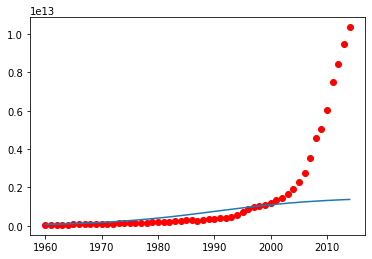

In [6]:
# Testing Model
beta_1 = 0.1
beta_2 = 1990

# Logistic Function
y_prediksi_awal = model_sigmoid(x_data, beta_1, beta_2)

plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, y_prediksi_awal * 1500000000000)
plt.show()

# Melakukan Normalisasi Data dan Menampilkan Model Prediksi

In [7]:
# Melakukan Normalisasi Data

x_scaled = (x_data - min (x_data)) / (max(x_data) - min(x_data))
y_scaled = (y_data - min (y_data)) / (max(y_data) - min(y_data))

In [15]:
# Menentukan Nilai Beta_1 dan Beta_2

from scipy.optimize import curve_fit
popt, pcov = curve_fit(model_sigmoid, x_scaled, y_scaled)
print("Beta_1 = {} Beta_2 = {}".format(popt[0], popt[1]))

Beta_1 = 18.869350407536267 Beta_2 = 0.8966631945557113


In [35]:
# Hitung y_prediksi normalisasi

y_prediksi= model_sigmoid(x_scaled, *popt)


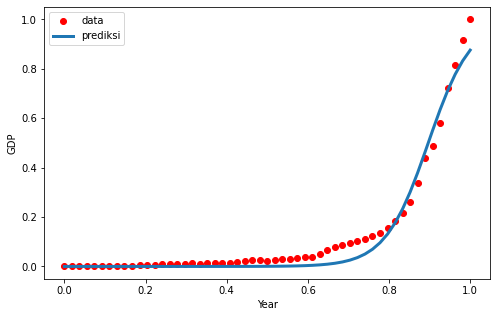

In [36]:
# Plot Hasil Regresi Non Linear

plt.figure(figsize = (8, 5))
plt.plot(x_scaled, y_scaled, 'ro', label = 'data')
plt.plot(x_scaled, y_prediksi, linewidth = 3.0, label = 'prediksi')
plt.legend(loc = 'best')
plt.ylabel("GDP")
plt.xlabel("Year")
plt.show()

# 1. Menghitung Nilai MAE, MSE, dan RMSE

In [37]:
#menghitung MAE, MSE, dan RMSE
mae = np.mean(np.absolute(y_scaled - y_prediksi))
mse = np.mean((y_scaled - y_prediksi)**2)
rmse = np.sqrt(mse)

print("Mean Absolute Error = " + str(round(mae, 4)))
print("Mean Squared Error = " + str(round(mse, 4)))
print("Root Mean Squared Error = " + str(round(rmse, 4)))


Mean Absolute Error = 0.0273
Mean Squared Error = 0.0014
Root Mean Squared Error = 0.0376


# 2. Tambahkan Grafik yang Menunjukkan Hubungan antara "Year" dan "GDP" dengan Nilai yang Sebenarnya (tidak dinormalisasi)

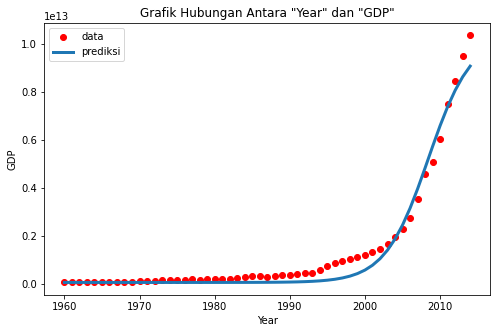

In [38]:
# Menambahkan grafik yang menunjukkan hubungan antara "Year" dan "GDP" dengan nilai yang sebenarnya (tidak dinormalisasi)

y_prediksi2 = (y_prediksi*(max(y_data)-min(y_data)))+min(y_data)
plt.figure(figsize=(8, 5))
plt.plot(x_data, y_data, 'ro', label = 'data')
plt.plot(x_data, y_prediksi2, linewidth = 3.0, label = 'prediksi')
plt.legend(loc = 'best')
plt.ylabel("GDP")
plt.xlabel("Year")
plt.title('Grafik Hubungan Antara "Year" dan "GDP"')
plt.show()

# 3. Tambahkan Grafik yang menunjukkan Prediksi GDP untuk tahun 2015 - 2030 menggunakan Nilai yang sebenarnya (tidak dinormalisasi)

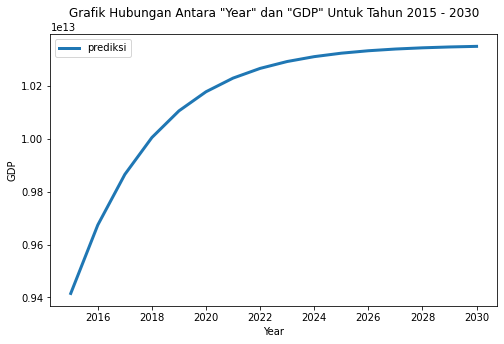

In [39]:
# Menambahkan grafik yang menunjukkan prediksi GDP untuk tahun 2015 - 2030 menggunakan nilai yang sebenarnya (tidak dinormalisasi)

x_uji = np.arange(2015, 2031)
x_uji_scaled = (x_uji-min(x_data))/(max(x_data)-min(x_data))
y_prediksi3 = model_sigmoid(x_uji_scaled, *popt)
y_prediksi4 = (y_prediksi3*(max(y_data)-min(y_data)))+min(y_data)
plt.figure(figsize=(8, 5))
plt.plot(x_uji, y_prediksi4, linewidth = 3.0, label = 'prediksi')
plt.legend(loc = 'best')
plt.ylabel("GDP")
plt.xlabel("Year")
plt.title('Grafik Hubungan Antara "Year" dan "GDP" Untuk Tahun 2015 - 2030')
plt.show()